In [1]:
# CSCI3230 / ESTR3108 2025-26 First Term Assignment 2
# I declare that the assignment here submitted is original except for source
# material explicitly acknowledged, and that the same or closely related material
# has not been previously submitted for another course. I also acknowledge that I
# am aware of University policy and regulations on honesty in academic work, and
# of the disciplinary guidelines and procedures applicable to breaches of such
# policy and regulations, as contained in the following websites.
# University Guideline on Academic Honesty:
# http://www.cuhk.edu.hk/policy/academichonesty/
# Faculty of Engineering Guidelines to Academic Honesty:`
# http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
# Student Name: Wong Kwok Kam
# Student ID : 1155192018

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Support Vectors:
  Index 1: x = (3.5, -2.0), y = 1
  Index 8: x = (4.0, -3.5), y = -1

Optimal weight vector: w* = (-0.40, 1.20)
Optimal bias: b* = 4.80

Optimal Hyperplane: f(x) = -0.40x₁ + 1.20x₂ + 4.80

Verification:
Constraint Σ αᵢyᵢ = 0.00 ✓
Point 1: y*f(x) = 1.00 ✓
Point 2: y*f(x) = 4.60 ✓
Point 3: y*f(x) = 7.20 ✓
Point 4: y*f(x) = 1.40 ✓
Point 5: y*f(x) = 3.00 ✓
Point 6: y*f(x) = 4.40 ✓
Point 7: y*f(x) = 1.20 ✓
Point 8: y*f(x) = 1.00 ✓


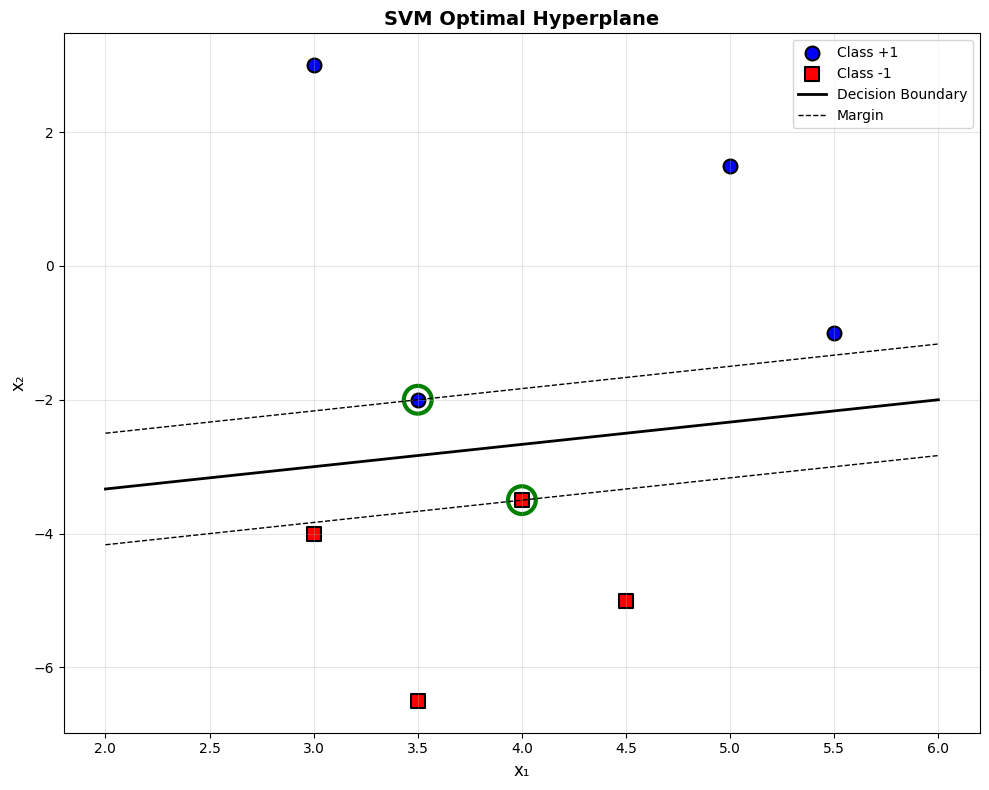

In [7]:
# Q1(a) Optimization Problem

# Training set
x1_train = np.array([3.5, 5, 3, 5.5, 4.5, 3.5, 3, 4])
x2_train = np.array([-2, 1.5, 3, -1, -5, -6.5, -4, -3.5])
X_train = np.column_stack([x1_train, x2_train])
y_train = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Given optimal alphas
alphas = np.array([0.8, 0, 0, 0, 0, 0, 0, 0.8])

# Identify support vectors (α > 0)
support_vector_indices = np.where(alphas > 0)[0]
print("Support Vectors:")
for idx in support_vector_indices:
    print(
        f"  Index {idx + 1}: x = ({X_train[idx, 0]}, {X_train[idx, 1]}), y = {y_train[idx]}"
    )

# Calculate w* = Σ αᵢ yᵢ xᵢ
w = np.sum(alphas[:, np.newaxis] * y_train[:, np.newaxis] * X_train, axis=0)
print(f"\nOptimal weight vector: w* = ({w[0]:.2f}, {w[1]:.2f})")

# Calculate b* using support vectors
b_values = []
for idx in support_vector_indices:
    b_i = y_train[idx] - np.dot(w, X_train[idx])
    b_values.append(b_i)
b = np.mean(b_values)
print(f"Optimal bias: b* = {b:.2f}")

# Optimal hyperplane
print(f"\nOptimal Hyperplane: f(x) = {w[0]:.2f}x₁ + {w[1]:.2f}x₂ + {b:.2f}")

# Verification
print("\nVerification:")
constraint = np.sum(alphas * y_train)
print(f"Constraint Σ αᵢyᵢ = {constraint:.2f} {'✓' if constraint == 0 else '✗'}")
for i in range(len(X_train)):
    decision = np.dot(w, X_train[i]) + b
    margin = y_train[i] * decision
    print(f"Point {i + 1}: y*f(x) = {margin:.2f} {'✓' if margin >= 0.99 else '✗'}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot training points
positive_mask = y_train == 1
negative_mask = y_train == -1
ax.scatter(
    X_train[positive_mask, 0],
    X_train[positive_mask, 1],
    c="blue",
    marker="o",
    s=100,
    label="Class +1",
    edgecolors="k",
    linewidths=1.5,
)
ax.scatter(
    X_train[negative_mask, 0],
    X_train[negative_mask, 1],
    c="red",
    marker="s",
    s=100,
    label="Class -1",
    edgecolors="k",
    linewidths=1.5,
)

# Highlight support vectors
for idx in support_vector_indices:
    ax.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        s=400,
        facecolors="none",
        edgecolors="green",
        linewidths=3,
    )

# Plot decision boundary and margins
x1_plot = np.linspace(2, 6, 100)
x2_decision = -(w[0] * x1_plot + b) / w[1]
x2_margin_plus = -(w[0] * x1_plot + b - 1) / w[1]
x2_margin_minus = -(w[0] * x1_plot + b + 1) / w[1]

ax.plot(x1_plot, x2_decision, "k-", linewidth=2, label="Decision Boundary")
ax.plot(x1_plot, x2_margin_plus, "k--", linewidth=1, label="Margin")
ax.plot(x1_plot, x2_margin_minus, "k--", linewidth=1)

ax.set_xlabel("x₁", fontsize=12)
ax.set_ylabel("x₂", fontsize=12)
ax.set_title("SVM Optimal Hyperplane", fontsize=14, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# Q1(b) Test on Test Set

# ============================================
# Given: Optimal Hyperplane Parameters
# ============================================
w = np.array([-0.4, 1.2])  # Weight vector
b = 4.8  # Bias term

# ============================================
# Test Data
# ============================================
x1_test = np.array([5.5, 3.5, 4.5, 2.5, 3.5, 2.5, 4, 5])
x2_test = np.array([0.5, -0.5, 1.5, -1, -4.5, -4, -6, -5])
X_test = np.column_stack([x1_test, x2_test])
y_test = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# ============================================
# Step 1: Compute Decision Function f(x)
# ============================================
def decision_function(X, w, b):
    """
    Compute f(x) = w·x + b for each point

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - f_x: array of decision function values
    """
    return np.dot(X, w) + b


# ============================================
# Step 2: Make Predictions
# ============================================
def predict(f_x):
    """
    Predict class labels using sign(f(x))

    Parameters:
    - f_x: array of decision function values

    Returns:
    - y_pred: predicted labels (+1 or -1)
    """
    return np.where(f_x >= 0, 1, -1)


# ============================================
# Step 3: Compute Distance to Hyperplane (Not required)
# ============================================
def distance_to_hyperplane(X, w, b):
    """
    Compute perpendicular distance from points to hyperplane

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - distances: array of distances
    """
    f_x = decision_function(X, w, b)
    w_norm = np.linalg.norm(w)
    return np.abs(f_x) / w_norm


# ============================================
# Make Predictions
# ============================================
f_values = decision_function(X_test, w, b)
y_pred = predict(f_values)
distances = distance_to_hyperplane(X_test, w, b)

# ============================================
# Evaluate Accuracy
# ============================================
accuracy = np.mean(y_pred == y_test) * 100

# ============================================
# Display Results
# ============================================
print("=" * 70)
print("SVM PREDICTION RESULTS")
print("=" * 70)
print(f"\nHyperplane: f(x) = {w[0]}x₁ + {w[1]}x₂ + {b}")
print(f"||w|| = {np.linalg.norm(w):.4f}")
print(f"Margin width = {2 / np.linalg.norm(w):.4f}")
print("\n" + "-" * 70)
print(
    f"{'Point':<8} {'x₁':<8} {'x₂':<8} {'f(x)':<10} {'ŷ':<6} {'y':<6} {'Correct':<10} {'Distance':<10}"
)
print("-" * 70)

for i in range(len(X_test)):
    correct = "✓" if y_pred[i] == y_test[i] else "✗"
    print(
        f"{i + 1:<8} {X_test[i, 0]:<8.1f} {X_test[i, 1]:<8.1f} "
        f"{f_values[i]:<10.2f} {y_pred[i]:<6d} {y_test[i]:<6d} "
        f"{correct:<10} {distances[i]:<10.2f}"
    )

print("-" * 70)
print(f"\nAccuracy: {accuracy:.1f}% ({np.sum(y_pred == y_test)}/{len(y_test)} correct)")
print("=" * 70)

# ============================================
# Alternative: Vectorized One-liner
# ============================================
# print("\n📌 Quick Prediction (One-liner):")
# y_pred_quick = np.sign(X_test @ w + b).astype(int)
# print(f"Predictions: {y_pred_quick}")


SVM PREDICTION RESULTS

Hyperplane: f(x) = -0.4x₁ + 1.2x₂ + 4.8
||w|| = 1.2649
Margin width = 1.5811

----------------------------------------------------------------------
Point    x₁       x₂       f(x)       ŷ      y      Correct    Distance  
----------------------------------------------------------------------
1        5.5      0.5      3.20       1      1      ✓          2.53      
2        3.5      -0.5     2.80       1      1      ✓          2.21      
3        4.5      1.5      4.80       1      1      ✓          3.79      
4        2.5      -1.0     2.60       1      1      ✓          2.06      
5        3.5      -4.5     -2.00      -1     -1     ✓          1.58      
6        2.5      -4.0     -1.00      -1     -1     ✓          0.79      
7        4.0      -6.0     -4.00      -1     -1     ✓          3.16      
8        5.0      -5.0     -3.20      -1     -1     ✓          2.53      
----------------------------------------------------------------------

Accuracy: 100.0% (

In [ ]:
# Q2 SVM
